<a href="https://colab.research.google.com/github/alekhya-latech/NHIS/blob/main/Hypertension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Predicting Hypertension

Abstract : The aim of this study is to develop prediction models using machine learning algorithms to predict hypertension. Data was acquired from a survey conducted on adult individuals by National Health Interview Survey (NHIS). A total of 10657 enrollments have cancer.
Feature selection is done using Chi2 and Mutual Information for continuous attributes while ANOVA and Kendall's was used for Categorical attributes, resulting in 41 selected features.Undersampling and oversampling techniques were implemented to balance the data, with oversampling performing better when the performance metrics were considered. Models with artificial neural network (ANN), AdaBoost, Decision Tree, Naive Bayes, Random forest, Logistic Regression and k-nearest neighbour(k=25) were trained to predict if an individual has cancer. Sensitivity(Recall), specificity, accuracy, and area under receiver operating characteristic (ROC) curve (AUC or ROC value) were used to determine the performance of the models.

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/adult21.csv")
data = data.drop(['HHX','WTFA_A'], axis=1)
hypertension = data[data['HYPEV_A']==1]
print(len(hypertension))
print(data['HYPEV_A'].value_counts())
print(len(data))

10657
2    18777
1    10657
7       29
9       19
Name: HYPEV_A, dtype: int64
29482


In [ ]:
data['HYPEV_A'] = data['HYPEV_A'].replace({
    2 : 0,
    7 : None,
    9 : None
})
data = data.dropna(axis=0,subset=['HYPEV_A'])
print(data['HYPEV_A'].value_counts(), len(data))

0.0    18777
1.0    10657
Name: HYPEV_A, dtype: int64 29434


In [ ]:
#Removing attributes with more than 5000 missing attributes
remove_list = []
for i in range(len(data.columns)):
  column_name = data.columns[i]
  if((data[column_name].isnull().sum())>5000):
    remove_list.append(column_name)

data.drop(remove_list, axis=1, inplace=True)
print(len(data.columns))

202


In [ ]:
# Replacing missing with mode
for column_name in data.columns:
  missing_count = data[column_name].isnull().sum()
  if(missing_count!=0):
    print(column_name , missing_count)
    mode_value = data[column_name].mode()[0]
    data[column_name].fillna(mode_value, inplace=True)

MAXEDUCP_A 84
INCOTHR_A 1211
INCRETIRE_A 1211
INCWELF_A 1211
INCSSISSDI_A 1211
INCSSRR_A 1211
WRKHLTHFC_A 2744
LIVEHEP_A 561
DIBLAST1_A 3130
USPLKIND_A 2791
WELLNESS_A 318
HINOTYR_A 2213
STEPS_A 2527
WLK13M_A 2704
WLK100_A 2527
HEARNYRM_A 39
HEARQTRM_A 28


In [ ]:
category_features = []
non_category_features = []
threshold = 13
for each in data.columns:
    if data[each].nunique() < threshold:
        category_features.append(each)
    else:
      non_category_features.append(each)
print(len(category_features))
print(non_category_features)
# for each in category_features:
#     df[each] = df[each].astype('category')

194
['RATCAT_A', 'PPSU', 'PSTRAT', 'WEIGHTLBTC_A', 'HEIGHTTC_A', 'LSATIS11R_A', 'AGEP_A', 'POVRATTC_A']


In [ ]:
print(category_features)

['URBRRL', 'IMPINCFLG_A', 'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'K6SPD_A', 'CITZNSTP_A', 'LEGMSTAT_A', 'MARSTAT_A', 'PCNTADTWFP_A', 'PCNTADTWKP_A', 'FDSCAT4_A', 'FDSCAT3_A', 'EMPWRKLSW1_A', 'SMKECIGST_A', 'SMKCIGST_A', 'BMICAT_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'PCNT18UPTC', 'PCNTLT18TC', 'LSATIS4R_A', 'NOTCOV_A', 'OTHGOV_A', 'OTHPUB_A', 'IHS_A', 'MILITARY_A', 'CHIP_A', 'MEDICAID_A', 'MEDICARE_A', 'PRIVATE_A', 'EDUCP_A', 'MAXEDUCP_A', 'PARSTAT_A', 'SAPARENTSC_A', 'MLTFAMFLG_A', 'OVER65FLG_A', 'PCNTADLT_A', 'PCNTKIDS_A', 'NUMCAN_A', 'HISDETP_A', 'HISP_A', 'REGION', 'INTV_QRT', 'SRVY_YR', 'SEX_A', 'ASTATNEW', 'HOUTENURE_A', 'HOUYRSLIV_A', 'FDSBALANCE_A', 'FDSLAST_A', 'FDSRUNOUT_A', 'FSNAP12M_A', 'INCOTHR_A', 'INCRETIRE_A', 'INCWELF_A', 'INCSSISSDI_A', 'INCSSRR_A', 'INCINTER_A', 'INCWRKO_A', 'SCHCURENR_A', 'NATUSBORN_A', 'AFVET_A', 'MARITAL_A', 'ORIENT_A', 'CMPSUPPORT_A', 'SUPPORT_A', 'SMOKELSEV_A', 'PIPEEV_A', 'CIGAREV_A', 'ECIGEV_A', 'SMKEV_A', 'TASTEUNW_A', 'TASTEFLAV_A', 'TASTECOMP

In [ ]:
categorical_data = data.drop(non_category_features,axis=1)
y = categorical_data['HYPEV_A']
X = categorical_data.drop('HYPEV_A',axis=1)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

info_gains = mutual_info_classif(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})
feature_scores.sort_values(by='Information Gain', ascending=False, inplace=True)
k = 40  # Number of features to select
gain = feature_scores['Feature'][:k].tolist()
print(gain)

['RX12M_A', 'CHLEV_A', 'MEDICARE_A', 'HIKIND02_A', 'PHSTAT_A', 'INCSSRR_A', 'OVER65FLG_A', 'DIFF_A', 'ARTHEV_A', 'DIBLAST1_A', 'PCNTADTWKP_A', 'SHTPNUEV_A', 'INCWRKO_A', 'PREDIB_A', 'PCNTADTWFP_A', 'CHOLLAST_A', 'EMPWRKLSW1_A', 'DIBEV_A', 'MARSTAT_A', 'LEGMSTAT_A', 'SOCWRKLIM_A', 'HOUYRSLIV_A', 'PCNTLT18TC', 'PARSTAT_A', 'CHDEV_A', 'INCRETIRE_A', 'EQUIP_A', 'BPLAST_A', 'PAIFRQ3M_A', 'SAPARENTSC_A', 'LASTDR_A', 'DISAB3_A', 'PCNTKIDS_A', 'UPPOBJCT_A', 'HEARNYRM_A', 'WLK13M_A', 'MIEV_A', 'BMICAT_A', 'HEARINGDF_A', 'HIKIND01_A']


In [ ]:
from scipy.stats import chi2_contingency

chi2_scores = []
p_values = []

for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
features_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})
features_scores.sort_values(by='P-value', inplace=True)
k = 40  # Number of features to select
chi = features_scores['Feature'][:k].tolist()
print(chi)

['PAIFRQ3M_A', 'ARTHEV_A', 'SHTPNUEV_A', 'MEDICARE_A', 'DIBLAST1_A', 'OVER65FLG_A', 'CHOLLAST_A', 'DIFF_A', 'EMPWRKLSW1_A', 'HOUYRSLIV_A', 'PREDIB_A', 'RX12M_A', 'PCNTADTWFP_A', 'MARSTAT_A', 'LEGMSTAT_A', 'INCSSRR_A', 'CHLEV_A', 'INCWRKO_A', 'HIKIND02_A', 'PHSTAT_A', 'PCNTADTWKP_A', 'DIBEV_A', 'SOCWRKLIM_A', 'PARSTAT_A', 'INCRETIRE_A', 'CHDEV_A', 'PCNTLT18TC', 'PCNTKIDS_A', 'BMICAT_A', 'EQUIP_A', 'SAPARENTSC_A', 'LASTDR_A', 'WLK13M_A', 'BPLAST_A', 'DISAB3_A', 'STEPS_A', 'UPPOBJCT_A', 'HIKIND03_A', 'HIKIND01_A', 'MIEV_A']


In [ ]:
from collections import Counter
cat_selected_list = []
selected_count = Counter(chi+gain).most_common()
for i in selected_count:
  if(i[1]==2):
    cat_selected_list.append(i[0])
print(cat_selected_list)
print(len(cat_selected_list))

['PAIFRQ3M_A', 'ARTHEV_A', 'SHTPNUEV_A', 'MEDICARE_A', 'DIBLAST1_A', 'OVER65FLG_A', 'CHOLLAST_A', 'DIFF_A', 'EMPWRKLSW1_A', 'HOUYRSLIV_A', 'PREDIB_A', 'RX12M_A', 'PCNTADTWFP_A', 'MARSTAT_A', 'LEGMSTAT_A', 'INCSSRR_A', 'CHLEV_A', 'INCWRKO_A', 'HIKIND02_A', 'PHSTAT_A', 'PCNTADTWKP_A', 'DIBEV_A', 'SOCWRKLIM_A', 'PARSTAT_A', 'INCRETIRE_A', 'CHDEV_A', 'PCNTLT18TC', 'PCNTKIDS_A', 'BMICAT_A', 'EQUIP_A', 'SAPARENTSC_A', 'LASTDR_A', 'WLK13M_A', 'BPLAST_A', 'DISAB3_A', 'UPPOBJCT_A', 'HIKIND01_A', 'MIEV_A']
38


In [ ]:
category_features.remove('HYPEV_A')
non_categorical_data = data.drop(category_features,axis=1)
y = non_categorical_data['HYPEV_A']
X = non_categorical_data.drop('HYPEV_A',axis=1)

In [ ]:
import numpy as np
from sklearn.feature_selection import f_classif, SelectPercentile

# Assuming you have already loaded X and y
percentile = 30  # Percentage of features to select (e.g., 20%)
total_features = X.shape[1]
num_features_to_select = int(total_features * (percentile / 100.0))

# Select the top features using ANOVA
selector = SelectPercentile(score_func=f_classif, percentile=percentile)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
anova = [X.columns[i] for i in selected_indices]

# Print the selected features
print("Selected Features:")
print(anova)


Selected Features:
['RATCAT_A', 'AGEP_A', 'POVRATTC_A']


In [ ]:
final_selected = cat_selected_list + anova
print(len(final_selected))

41


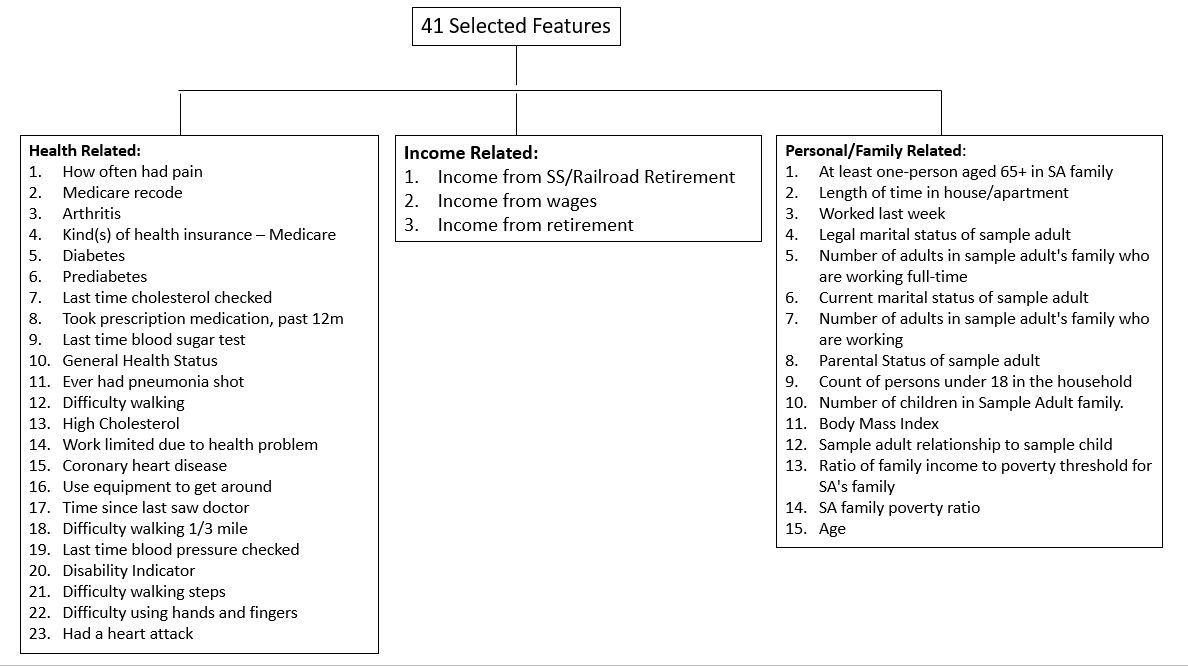

Text(0, 0.5, 'Percent')

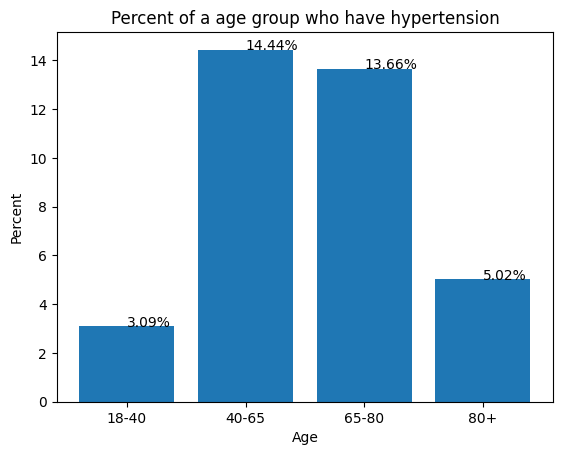

In [ ]:
#Age risk on Top 5 Cancer
from matplotlib import pyplot as plt
u40=0
u65 = 0
u80 = 0
o80=0
for i in hypertension['AGEP_A']:
  if i<40:
    u40= u40+1
  elif i<65:
    u65 = u65+1
  elif i<80:
    u80 = u80+1
  else:
    o80 = o80+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')

x = ["18-40", "40-65", "65-80", "80+"]
y = [round(u40/len(data)*100,2), round(u65/len(data)*100,2), round(u80/len(data)*100,2), round(o80/len(data)*100,2)]
plt.bar(x,y)
plt.title("Percent of a age group who have hypertension")
addlabels(x, y)
plt.xlabel("Age")
plt.ylabel("Percent")


Text(0, 0.5, 'Percent')

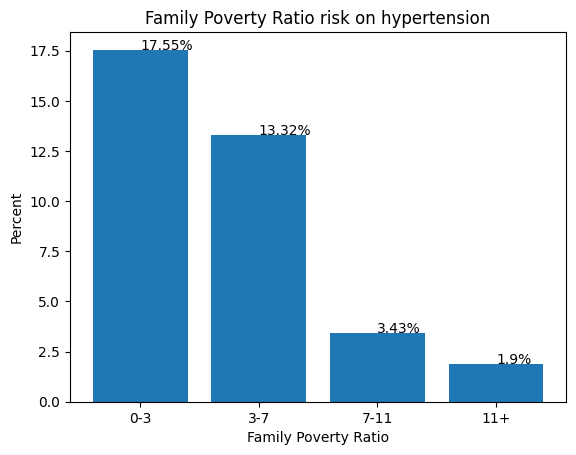

In [ ]:
#Family Poverty Ratio risk on Top 5 Cancer
u3=0
u7 = 0
u11 = 0
o11=0
for i in hypertension['POVRATTC_A']:
  if i<3:
    u3= u3+1
  elif i<7:
    u7 = u7+1
  elif i<11:
    u11 = u11+1
  else:
    o11 = o11+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')

x = ["0-3", "3-7", "7-11", "11+"]
y = [round(u3/len(data)*100,2),round(u7/len(data)*100,2),round(u11/len(data)*100,2),round(o11/len(data)*100,2)]
plt.bar(x,y)
plt.title("Family Poverty Ratio risk on hypertension")
addlabels(x, y)
plt.xlabel("Family Poverty Ratio")
plt.ylabel("Percent")


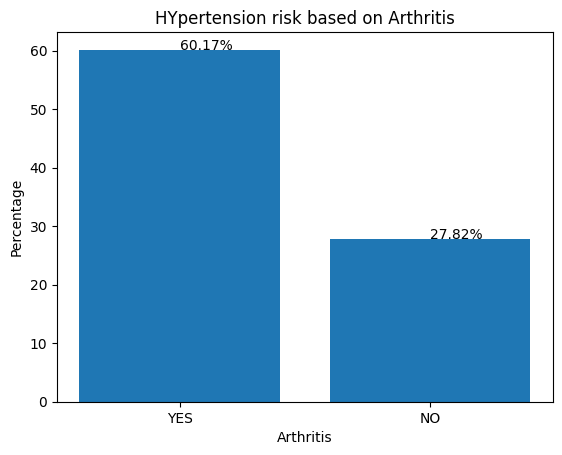

In [ ]:
#Arthritis related to Top % Cancer risk

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((hypertension["ARTHEV_A"].value_counts()[1]/data["ARTHEV_A"].value_counts()[1])*100,2),round((hypertension["ARTHEV_A"].value_counts()[2]/data["ARTHEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("HYpertension risk based on Arthritis")
plt.xlabel("Arthritis")
plt.ylabel("Percentage")
addlabels(x,y)

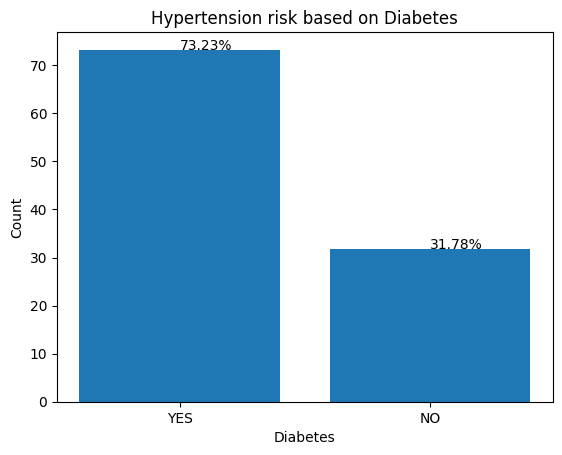

In [ ]:
# Diabetes related to Top % Cancer risk

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((hypertension["DIBEV_A"].value_counts()[1]/data["DIBEV_A"].value_counts()[1])*100,2),round((hypertension["DIBEV_A"].value_counts()[2]/data["DIBEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Hypertension risk based on Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")
addlabels(x,y)

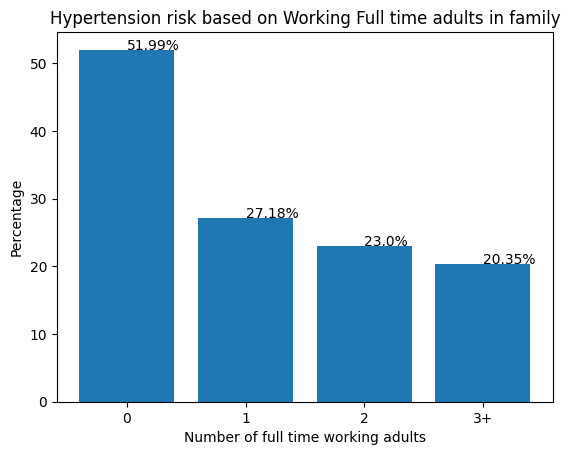

In [ ]:
from matplotlib import pyplot as plt
x = ['0',
    '1',
   '2',
   '3+']
y = [round((hypertension["PCNTADTWFP_A"].value_counts()[0]/data["PCNTADTWFP_A"].value_counts()[0])*100,2),
     round((hypertension["PCNTADTWFP_A"].value_counts()[1]/data["PCNTADTWFP_A"].value_counts()[1])*100,2),
     round((hypertension["PCNTADTWFP_A"].value_counts()[2]/data["PCNTADTWFP_A"].value_counts()[2])*100,2),
     round((hypertension["PCNTADTWFP_A"].value_counts()[3]/data["PCNTADTWFP_A"].value_counts()[3])*100,2)]
plt.bar(x,y)
type_df = pd.DataFrame({"Working":x,
                  "Percent":y})

df_sorted= type_df.sort_values('Percent')

plt.title("Hypertension risk based on Working Full time adults in family")
plt.ylabel("Percentage")
plt.xlabel("Number of full time working adults")
addlabels(x,y)



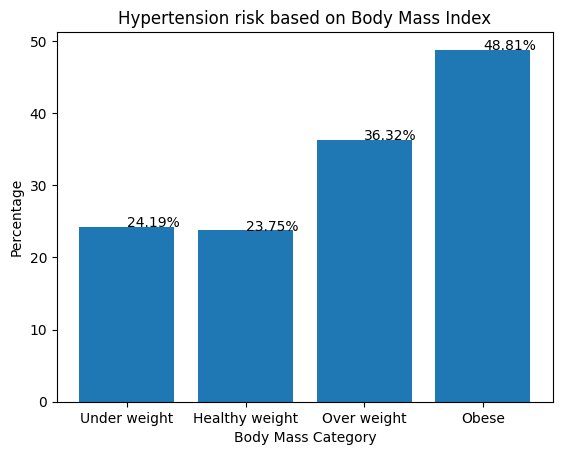

In [ ]:
x = ['Under weight',
    'Healthy weight',
   'Over weight',
   'Obese']
y = [round((hypertension["BMICAT_A"].value_counts()[1]/data["BMICAT_A"].value_counts()[1])*100,2),
     round((hypertension["BMICAT_A"].value_counts()[2]/data["BMICAT_A"].value_counts()[2])*100,2),
     round((hypertension["BMICAT_A"].value_counts()[3]/data["BMICAT_A"].value_counts()[3])*100,2),
     round((hypertension["BMICAT_A"].value_counts()[4]/data["BMICAT_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
type_df = pd.DataFrame({"Body Mass":x,
                  "Percent":y})

df_sorted= type_df.sort_values('Percent')

plt.title("Hypertension risk based on Body Mass Index")
plt.ylabel("Percentage")
plt.xlabel("Body Mass Category")
addlabels(x,y)



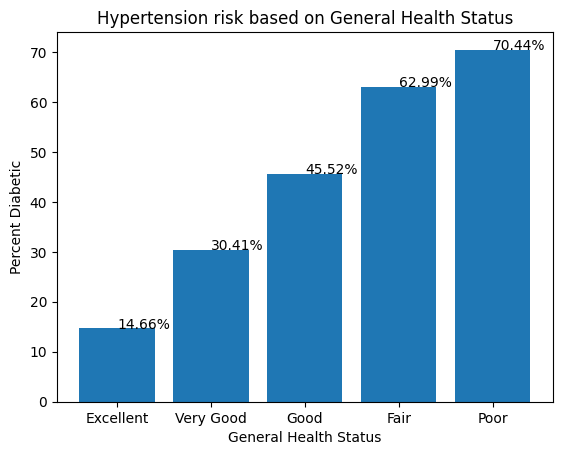

In [ ]:
#PHSTAT_A General HealthStatus

from matplotlib import pyplot as plt
x = ["Excellent", "Very Good", "Good","Fair","Poor"]
y = [round((hypertension["PHSTAT_A"].value_counts()[1]/data["PHSTAT_A"].value_counts()[1])*100,2),
     round((hypertension["PHSTAT_A"].value_counts()[2]/data["PHSTAT_A"].value_counts()[2])*100,2),
     round((hypertension["PHSTAT_A"].value_counts()[3]/data["PHSTAT_A"].value_counts()[3])*100,2),
     round((hypertension["PHSTAT_A"].value_counts()[4]/data["PHSTAT_A"].value_counts()[4])*100,2),
     round((hypertension["PHSTAT_A"].value_counts()[5]/data["PHSTAT_A"].value_counts()[5])*100,2)]
plt.bar(x,y)
plt.title("Hypertension risk based on General Health Status")
plt.xlabel("General Health Status")
plt.ylabel("Percent Diabetic")
addlabels(x,y)

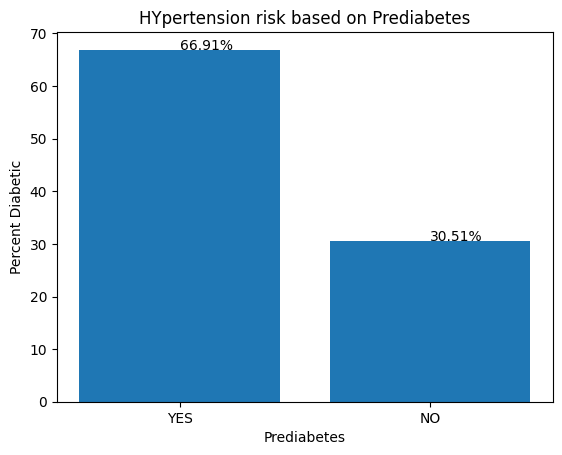

In [ ]:
#PREDIABETES

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((hypertension["PREDIB_A"].value_counts()[1]/data["PREDIB_A"].value_counts()[1])*100,2),round((hypertension["PREDIB_A"].value_counts()[2]/data["PREDIB_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("HYpertension risk based on Prediabetes")
plt.xlabel("Prediabetes")
plt.ylabel("Percent Diabetic")
addlabels(x,y)

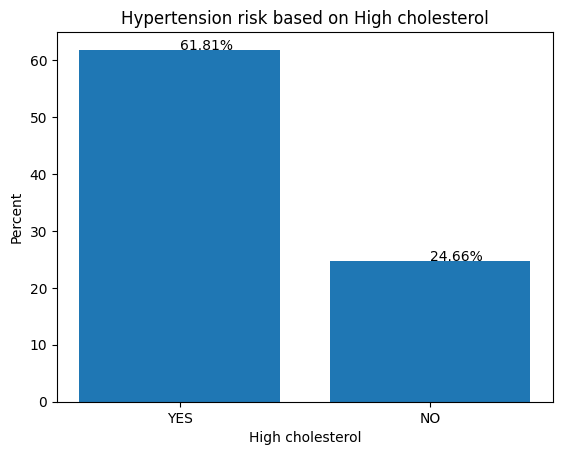

In [ ]:
# High cholesterol

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((hypertension["CHLEV_A"].value_counts()[1]/data["CHLEV_A"].value_counts()[1])*100,2),round((hypertension["CHLEV_A"].value_counts()[2]/data["CHLEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Hypertension risk based on High cholesterol")
plt.xlabel("High cholesterol")
plt.ylabel("Percent")
addlabels(x,y)

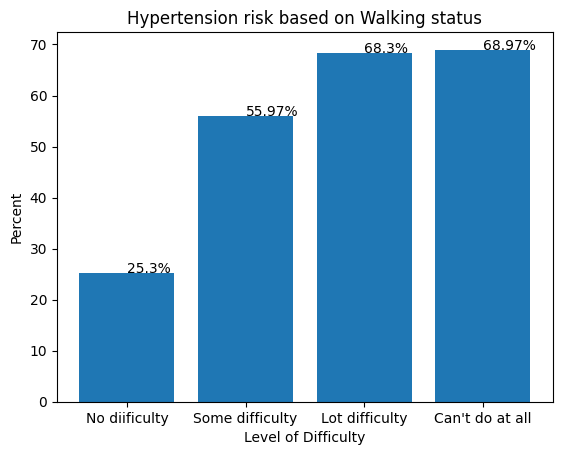

In [ ]:
#Difficulty walking 1/3 mile
from matplotlib import pyplot as plt
x = ["No diificulty", "Some difficulty", "Lot difficulty", "Can't do at all"]
y = [round((hypertension["WLK13M_A"].value_counts()[1]/data["WLK13M_A"].value_counts()[1])*100,2),round((hypertension["WLK13M_A"].value_counts()[2]/data["WLK13M_A"].value_counts()[2])*100,2),
     round((hypertension["WLK13M_A"].value_counts()[3]/data["WLK13M_A"].value_counts()[3])*100,2),round((hypertension["WLK13M_A"].value_counts()[4]/data["WLK13M_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
plt.title("Hypertension risk based on Walking status")
plt.xlabel("Level of Difficulty")
plt.ylabel("Percent")
addlabels(x,y)

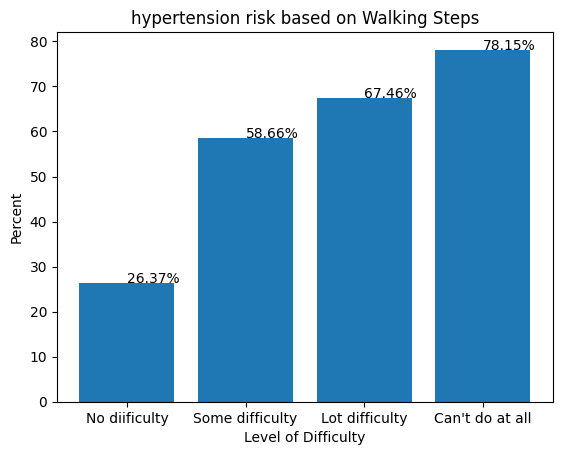

In [ ]:
#Difficulty walking steps
from matplotlib import pyplot as plt
x = ["No diificulty", "Some difficulty", "Lot difficulty", "Can't do at all"]
y = [round((hypertension["STEPS_A"].value_counts()[1]/data["STEPS_A"].value_counts()[1])*100,2),round((hypertension["STEPS_A"].value_counts()[2]/data["STEPS_A"].value_counts()[2])*100,2),
     round((hypertension["STEPS_A"].value_counts()[3]/data["STEPS_A"].value_counts()[3])*100,2),round((hypertension["STEPS_A"].value_counts()[4]/data["STEPS_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
plt.title("hypertension risk based on Walking Steps")
plt.xlabel("Level of Difficulty")
plt.ylabel("Percent")
addlabels(x,y)

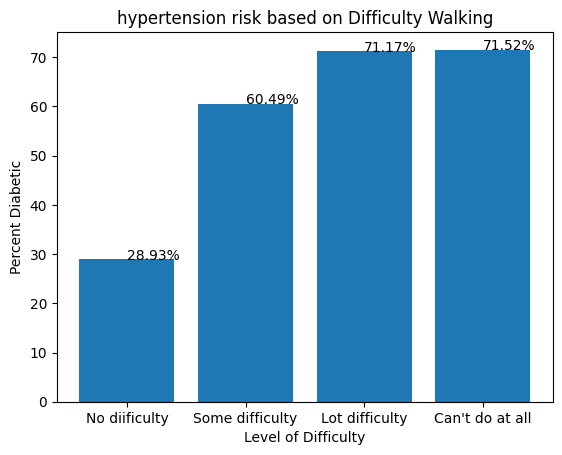

In [ ]:
#Difficulty walking
from matplotlib import pyplot as plt
x = ["No diificulty", "Some difficulty", "Lot difficulty", "Can't do at all"]
y = [round((hypertension["DIFF_A"].value_counts()[1]/data["DIFF_A"].value_counts()[1])*100,2),round((hypertension["DIFF_A"].value_counts()[2]/data["DIFF_A"].value_counts()[2])*100,2),
     round((hypertension["DIFF_A"].value_counts()[3]/data["DIFF_A"].value_counts()[3])*100,2),round((hypertension["DIFF_A"].value_counts()[4]/data["DIFF_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
plt.title("hypertension risk based on Difficulty Walking")
plt.xlabel("Level of Difficulty")
plt.ylabel("Percent Diabetic")
addlabels(x,y)

In [ ]:
final_selected.append('HYPEV_A')
for i in data.columns:
  if i not in final_selected:
    data = data.drop(i,axis=1)

print(data.columns)

Index(['RATCAT_A', 'DISAB3_A', 'LEGMSTAT_A', 'MARSTAT_A', 'PCNTADTWFP_A',
       'PCNTADTWKP_A', 'EMPWRKLSW1_A', 'BMICAT_A', 'PCNTLT18TC', 'MEDICARE_A',
       'PARSTAT_A', 'SAPARENTSC_A', 'OVER65FLG_A', 'PCNTKIDS_A', 'AGEP_A',
       'HOUYRSLIV_A', 'INCRETIRE_A', 'INCSSRR_A', 'INCWRKO_A', 'PAIFRQ3M_A',
       'SHTPNUEV_A', 'DIBLAST1_A', 'CHOLLAST_A', 'BPLAST_A', 'RX12M_A',
       'LASTDR_A', 'HIKIND02_A', 'HIKIND01_A', 'SOCWRKLIM_A', 'UPPOBJCT_A',
       'WLK13M_A', 'EQUIP_A', 'DIFF_A', 'ARTHEV_A', 'DIBEV_A', 'PREDIB_A',
       'MIEV_A', 'CHDEV_A', 'CHLEV_A', 'HYPEV_A', 'PHSTAT_A', 'POVRATTC_A'],
      dtype='object')


In [ ]:
print(len(data.columns))

42


In [ ]:

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=len(data),
    n_features=len(data.columns)-1,
    weights=[(data['HYPEV_A'].value_counts()[0])/len(data)],
    flip_y=0,
    random_state=42
)


In [ ]:
print((data['HYPEV_A'].value_counts()[0])/len(data))

0.63793572059523


In [ ]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('HYPEV_A', axis=1), data['HYPEV_A'], test_size=0.2, random_state=42)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)
print("Decision Tree\t", accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ANN\t", accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)
y_pred = naive_bayes.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("Naive Bayes\t", accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("KNN\t",accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("AdaBoost\t",accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("Random forest\t",accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("Logistic Regression\t",accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)


ROC: 0.6753591866499278
Decision Tree	 0.6899949040258196 	 0.6251198465963567 	 0.5556028973157222 	 0.6753591866499278 	 0.7255985267034991
Epoch 1/10
936/936 [==============================] - 3s 2ms/step - loss: 0.4111
Epoch 2/10
936/936 [==============================] - 2s 2ms/step - loss: 0.1868
Epoch 3/10
936/936 [==============================] - 2s 2ms/step - loss: 0.1788
Epoch 4/10
936/936 [==============================] - 3s 3ms/step - loss: 0.1742
Epoch 5/10
936/936 [==============================] - 3s 3ms/step - loss: 0.1749
Epoch 6/10
936/936 [==============================] - 3s 3ms/step - loss: 0.1665
Epoch 7/10
936/936 [==============================] - 2s 2ms/step - loss: 0.1661
Epoch 8/10
936/936 [==============================] - 2s 2ms/step - loss: 0.1658
Epoch 9/10
936/936 [==============================] - 2s 3ms/step - loss: 0.1632
Epoch 10/10
184/184 [==============================] - 0s 1ms/step
ANN	 0.7691523696279939 	 0.6035474592521572 	 0.7029592406476

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


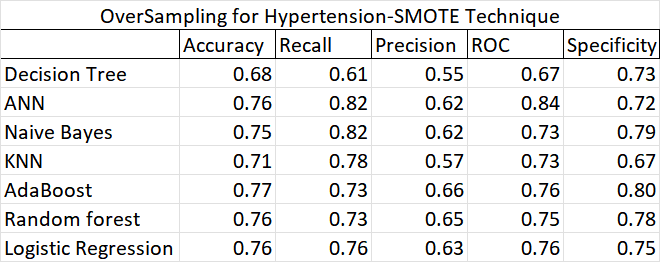

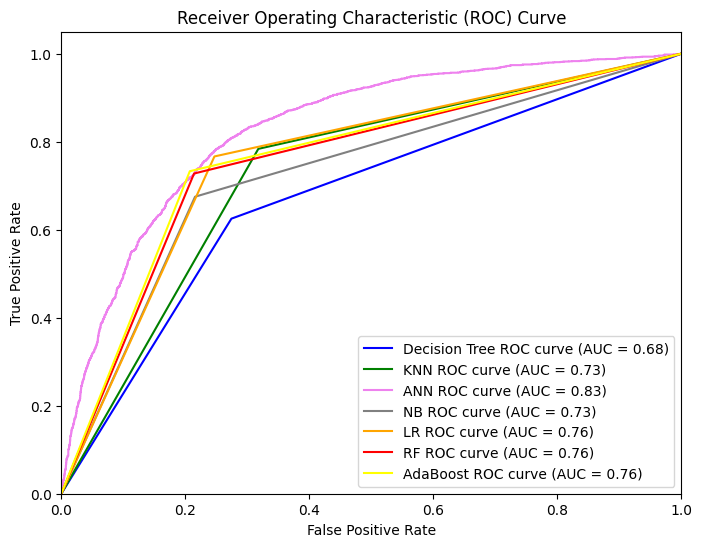

In [ ]:
# Plotting the ROC curve
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(decision_fpr, decision_tpr, color='blue', label='Decision Tree ROC curve (AUC = %0.2f)' % decision_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', label='KNN ROC curve (AUC = %0.2f)' % knn_roc_auc)
plt.plot(ann_fpr, ann_tpr, color='violet', label='ANN ROC curve (AUC = %0.2f)' % ann_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='grey', label='NB ROC curve (AUC = %0.2f)' % nb_roc_auc)
plt.plot(lg_fpr, lg_tpr, color='orange', label='LR ROC curve (AUC = %0.2f)' % lg_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red', label='RF ROC curve (AUC = %0.2f)' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='yellow', label='AdaBoost ROC curve (AUC = %0.2f)' % ada_roc_auc)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from imblearn.under_sampling import ClusterCentroids
#Decision Tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd

cc = ClusterCentroids()
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

#Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("Decision Tree\t", accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ANN\t", accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)
y_pred = naive_bayes.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("Naive Bayes\t", accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("KNN\t",accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("AdaBoost\t",accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("Random forest\t",accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("Logistic Regression\t",accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Decision Tree	 0.6424324783421097 	 0.7094918504314478 	 0.4968110104061766 	 0.6575609738871263 	 0.6056300973428045
Epoch 1/10
536/536 [==============================] - 2s 2ms/step - loss: 0.2676
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 0.1962
Epoch 3/10
536/536 [==============================] - 2s 3ms/step - loss: 0.1908
Epoch 4/10
536/536 [==============================] - 2s 3ms/step - loss: 0.1914
Epoch 5/10
536/536 [==============================] - 1s 3ms/step - loss: 0.1861
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.1835
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.1827
Epoch 8/10
536/536 [==============================] - 1s 2ms/step - loss: 0.1741
Epoch 9/10
536/536 [==============================] - 1s 2ms/step - loss: 0.1763
Epoch 10/10
184/184 [==============================] - 0s 2ms/step
ANN	 0.7119075930015288 	 0.8571428571428571 	 0.5612052730696798 	 0.8203700999106307

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


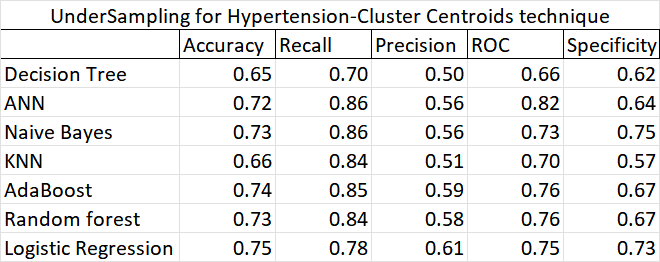

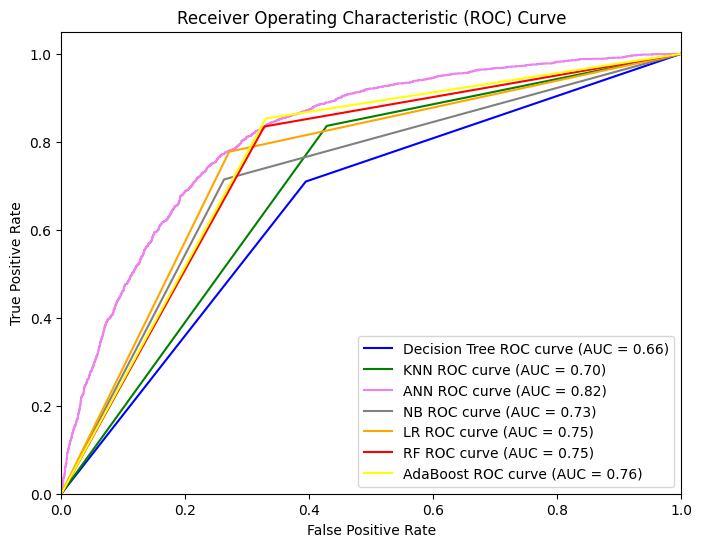

In [ ]:
# Plotting the ROC curve
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(decision_fpr, decision_tpr, color='blue', label='Decision Tree ROC curve (AUC = %0.2f)' % decision_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', label='KNN ROC curve (AUC = %0.2f)' % knn_roc_auc)
plt.plot(ann_fpr, ann_tpr, color='violet', label='ANN ROC curve (AUC = %0.2f)' % ann_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='grey', label='NB ROC curve (AUC = %0.2f)' % nb_roc_auc)
plt.plot(lg_fpr, lg_tpr, color='orange', label='LR ROC curve (AUC = %0.2f)' % lg_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red', label='RF ROC curve (AUC = %0.2f)' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='yellow', label='AdaBoost ROC curve (AUC = %0.2f)' % ada_roc_auc)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()